In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import os

import cv2
from PIL import Image

In [3]:
import os
for dirname, _, filenames in os.walk('C:\\workspace\\Brain tumor\\brain_tumor_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

C:\workspace\Brain tumor\brain_tumor_dataset\no\1 no.jpeg
C:\workspace\Brain tumor\brain_tumor_dataset\yes\Y1.jpg


In [4]:
folder_path_no = "C:\\workspace\\Brain tumor\\brain_tumor_dataset\\no"
folder_path_yes = "C:\\workspace\\Brain tumor\\brain_tumor_dataset\\yes"

f_no = os.listdir(folder_path_no)
f_yes = os.listdir(folder_path_yes)

print(len(f_no))
print(len(f_yes))

98
155


In [5]:
no_label = [0]*len(f_no)
yes_label = [1]*len(f_yes)

labels = no_label + yes_label
print(len(labels))

253


In [6]:
print(labels[:5])
print(labels[-5:])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [7]:
data = []

for img in f_no:
    image = Image.open( "C:\\workspace\\Brain tumor\\brain_tumor_dataset\\no\\" + img )
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

for img in f_yes:
    image = Image.open( "C:\\workspace\\Brain tumor\\brain_tumor_dataset\\yes\\"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

In [8]:
len(data)

253

In [9]:
data[0].shape

(224, 224, 3)

In [10]:
X = np.array(data)
y = np.array(labels)
# Reshape the data to have two dimensions (n_samples, n_features)
X = X.reshape(X.shape[0], -1)

In [11]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [15]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [18]:
# Instantiate a Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Fit the model on the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.metrics import classification_report
# Calculate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9411764705882353
Precision: 0.9117647058823529
Recall: 1.0
F1-Score: 0.9538461538461539
Confusion Matrix:
[[17  3]
 [ 0 31]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.91      1.00      0.95        31

    accuracy                           0.94        51
   macro avg       0.96      0.93      0.94        51
weighted avg       0.95      0.94      0.94        51



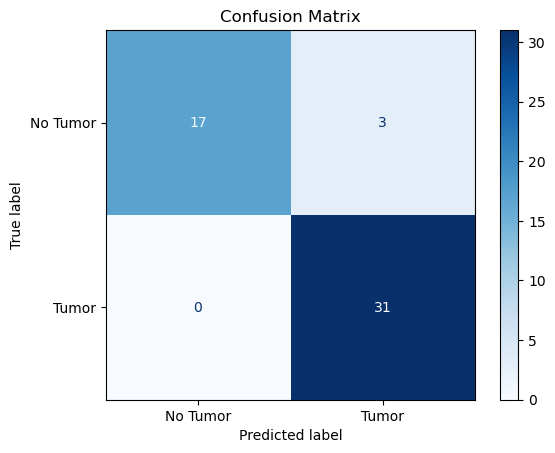

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

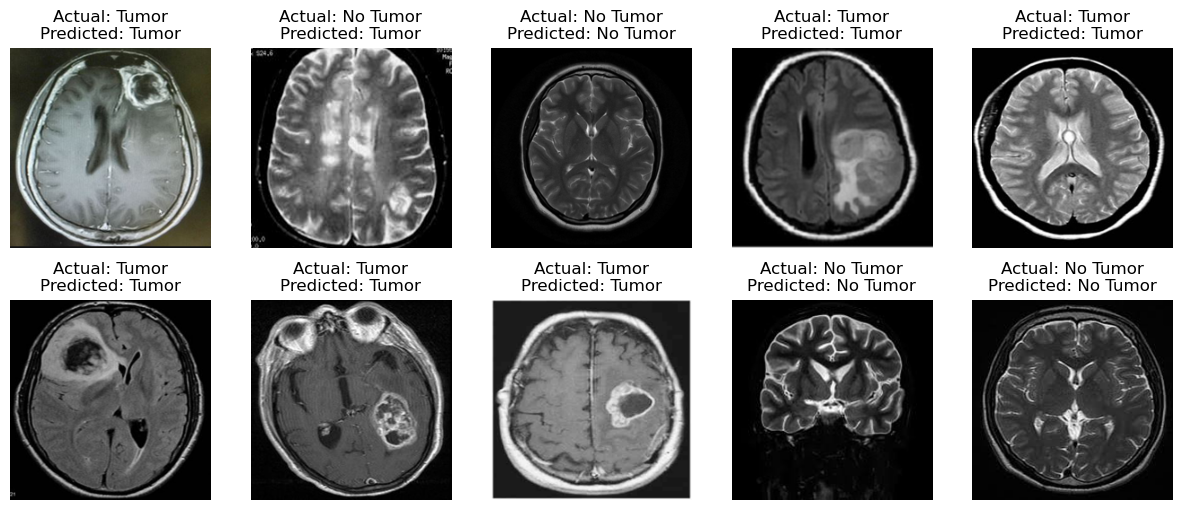

In [20]:
# Display images with actual and predicted labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(224, 224, 3))
    true_label = "Tumor" if y_test[i] == 1 else "No Tumor"
    pred_label = "Tumor" if y_pred[i] == 1 else "No Tumor"
    ax.set_title(f"Actual: {true_label}\nPredicted: {pred_label}")
    ax.axis('off')

plt.show()